In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import util as util


In [2]:
df=pd.read_csv("C://Users//HP//Downloads//output_data.csv")
df

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


In [3]:
df=util.drop_values(df,col_list=["OC","OT","PC"])
df

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


In [4]:
uni=5
unique_device, device_list = util.make_deviceid_dict(df, uni)

In [5]:
print(unique_device)

['e77b973a-b7c9-4113-8598-4e85be9a8b34', '19083212-f248-48f5-b7c2-1902d366da74', '26fef3fe-5c95-49b3-aff3-737124c6244b', 'db18c473-1dc3-4d2a-b6b9-60db12b71009', '6aa15284-a078-4f25-b1b9-7045ce071b47']


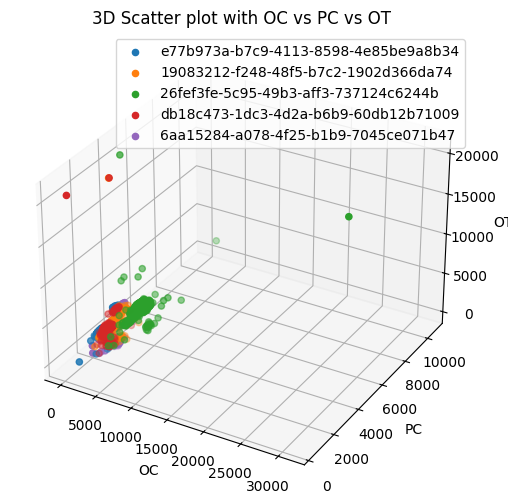

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def matplotlib_plot(df, unique_device):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for device in unique_device[:5]:  # Limiting to the first 5 devices
        sub_data_frame = df[df["DeviceID"] == device]
        ax.scatter(sub_data_frame["OC"], sub_data_frame["PC"], sub_data_frame["OT"], label=device)
    
    ax.set_xlabel("OC")
    ax.set_ylabel("PC")
    ax.set_zlabel("OT")
    ax.set_title("3D Scatter plot with OC vs PC vs OT")
    ax.legend()
    plt.show()

matplotlib_plot(df, unique_device)



In [7]:
import plotly.express as px

def plotly_plot(df, unique_device):
    # Limiting to the first 5 devices for visualization
    filtered_df = df[df["DeviceID"].isin(unique_device[:5])]
    
    fig = px.scatter_3d(
        filtered_df,
        x="OC",
        y="PC",
        z="OT",
        color="DeviceID",
        labels={"OC": "OC", "PC": "PC", "OT": "OT"},
        title="3D Scatter plot with OC vs PC vs OT"
    )
    
    fig.show()

plotly_plot(df, unique_device)



In [8]:
df=df[df["DeviceID"].isin(unique_device)]
df


,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


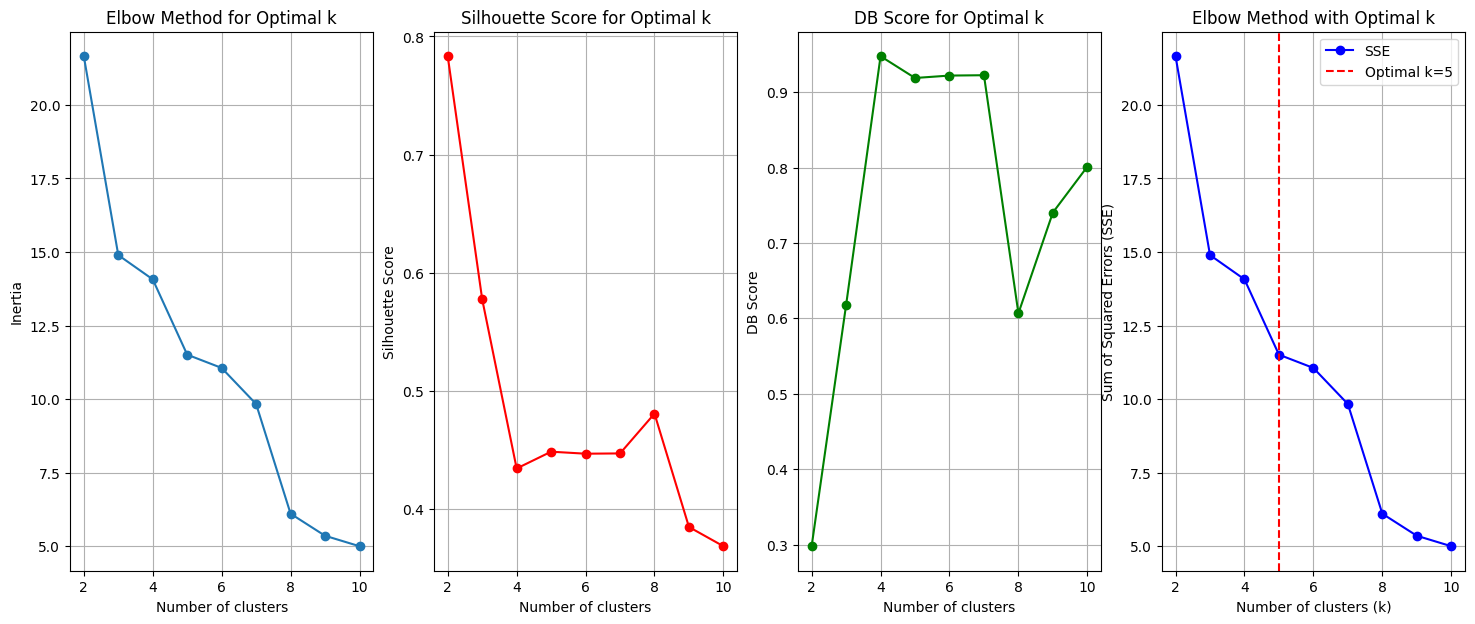

In [9]:
from util import k_score
data_to_cluster = df[["OC","OT","PC",]]
optimal_v=k_score(data_to_cluster)

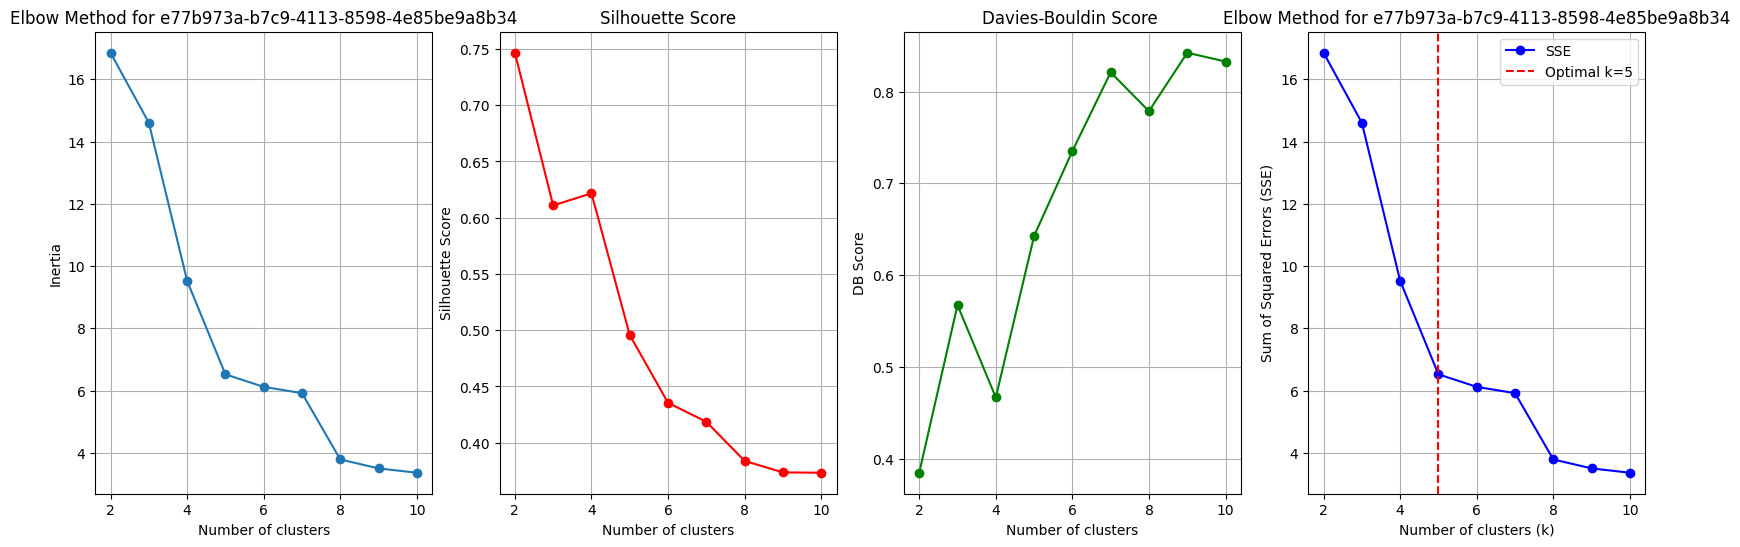

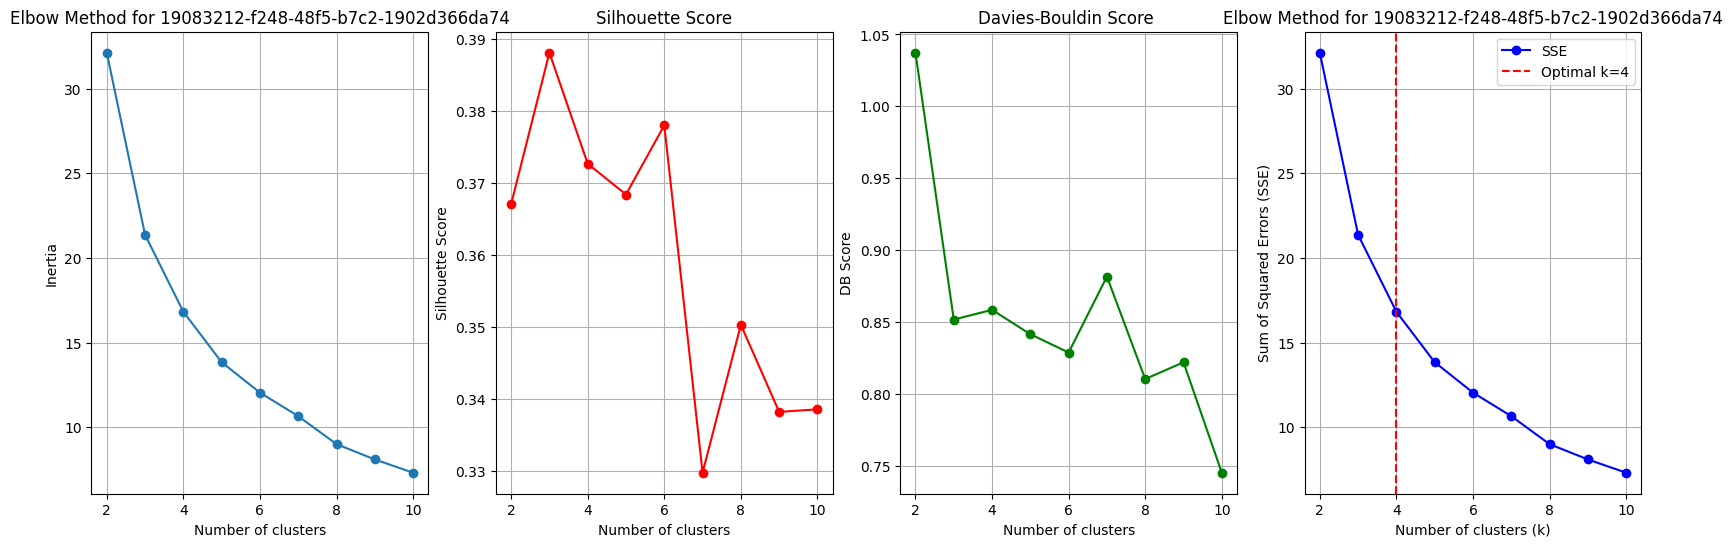

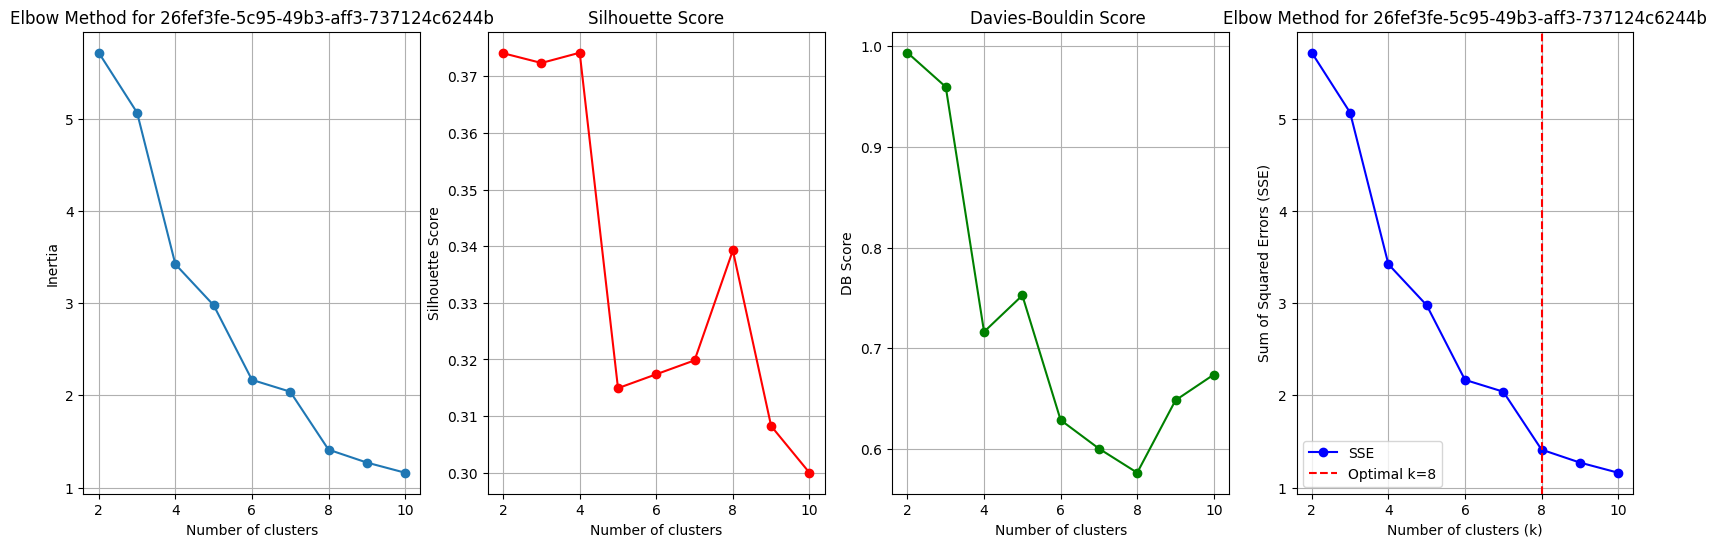

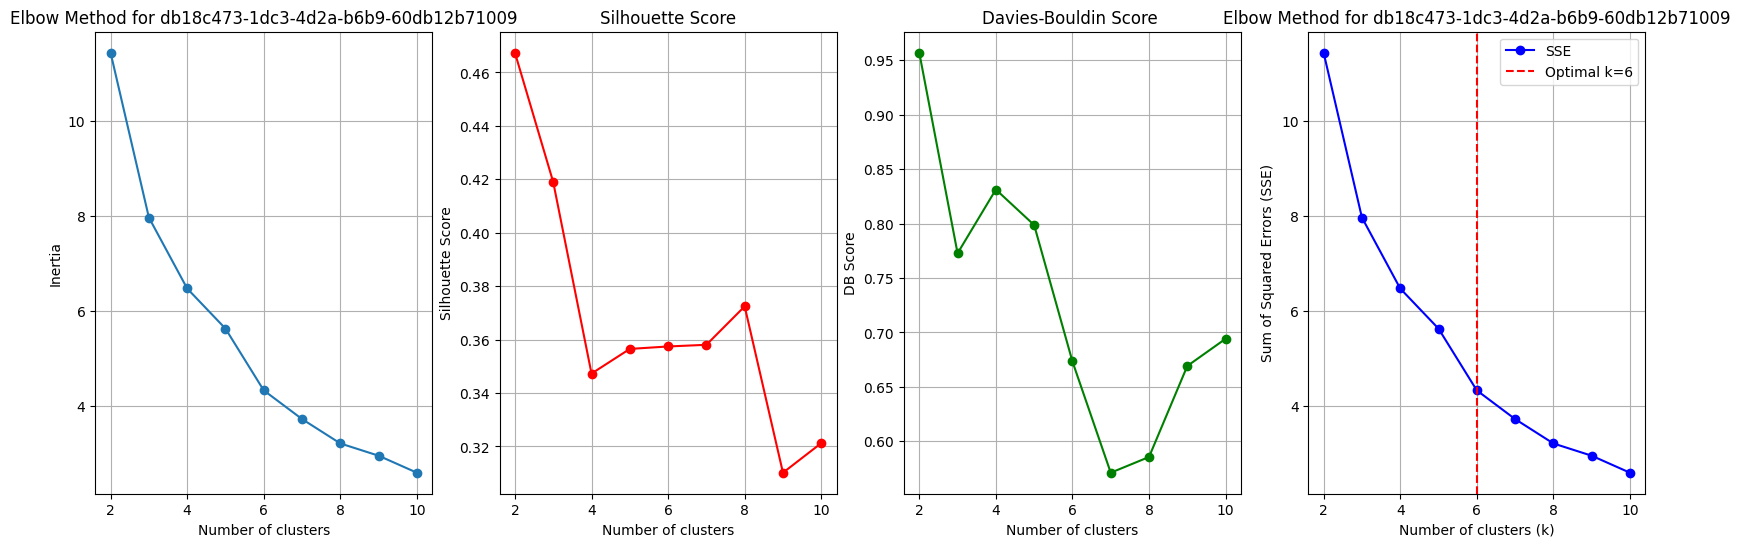

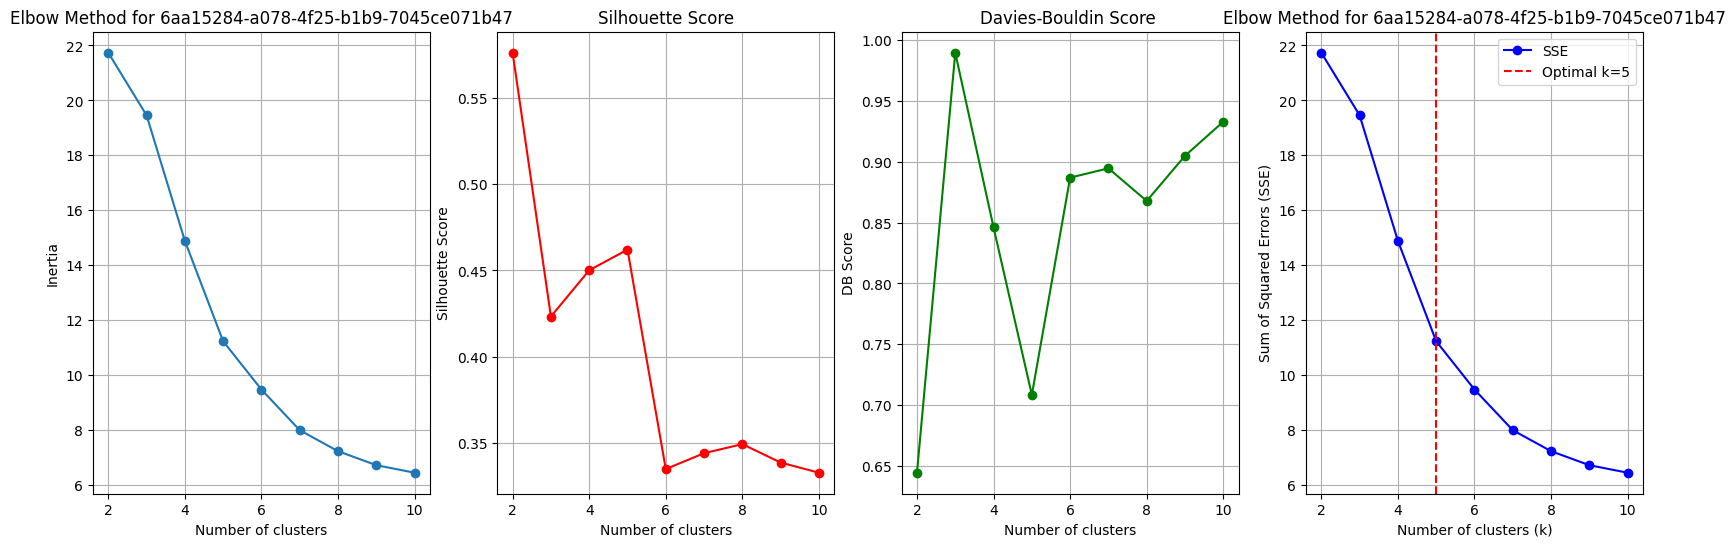

{'e77b973a-b7c9-4113-8598-4e85be9a8b34': np.int64(5), '19083212-f248-48f5-b7c2-1902d366da74': np.int64(4), '26fef3fe-5c95-49b3-aff3-737124c6244b': np.int64(8), 'db18c473-1dc3-4d2a-b6b9-60db12b71009': np.int64(6), '6aa15284-a078-4f25-b1b9-7045ce071b47': np.int64(5)}


In [13]:
from util import k_score_each_device
device_feature=["OC","OT","PC"]
kscore_dict= util.k_score_each_device( device_list,device_feature)
print(kscore_dict)

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
def train(df,kscore_dict,unique_device, device_feature):
    models={}
    for device in unique_device:
        scaler = MinMaxScaler()
        sub_df=df[df["DeviceID"]==device]
        if device in kscore_dict.keys():
            k=kscore_dict[device]
        model=KMeans(n_clusters=int(k))
        scalar = scaler.fit(sub_df[device_feature])
        model.fit(scalar.transform(sub_df[device_feature]))
        models[device]=model
    return models

In [14]:
def plot_cluster_dataset(df: pd.DataFrame, unique_device: list[int], model: KMeans):
    plt.figure(figsize=(14, 7))
    for i in range(len(model.cluster_centers_)):
        sub_df = df[df["Cluster"] == i]
        scaler=MinMaxScaler()
        scalar = scaler.fit(sub_df[device_feature])
        cluster_center = scalar.inverse_transform([model.cluster_centers_[i]])[0]
        cluster_center = [int(cluster_center[0]), int(cluster_center[1])]
        # adding cluster percentage
        cluster_center.append(int(sub_df.shape[0] / df.shape[0] * 100))
        plt.scatter(sub_df["OC"], sub_df["PC"], label=cluster_center)
    plt.xlabel("OC")
    plt.ylabel("PC")
    plt.title(f"Scatter Plot with OC vs PC [{unique_device}]")
    plt.legend()
    plt.show()

In [15]:

models=train(df,kscore_dict,unique_device, device_feature)


C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



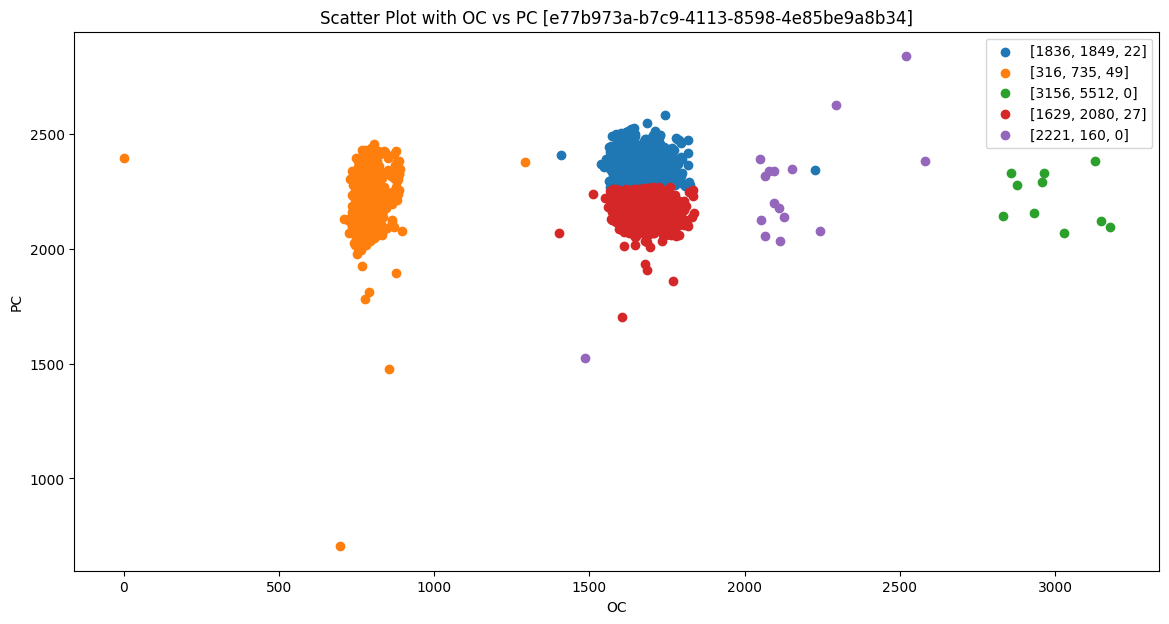

C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



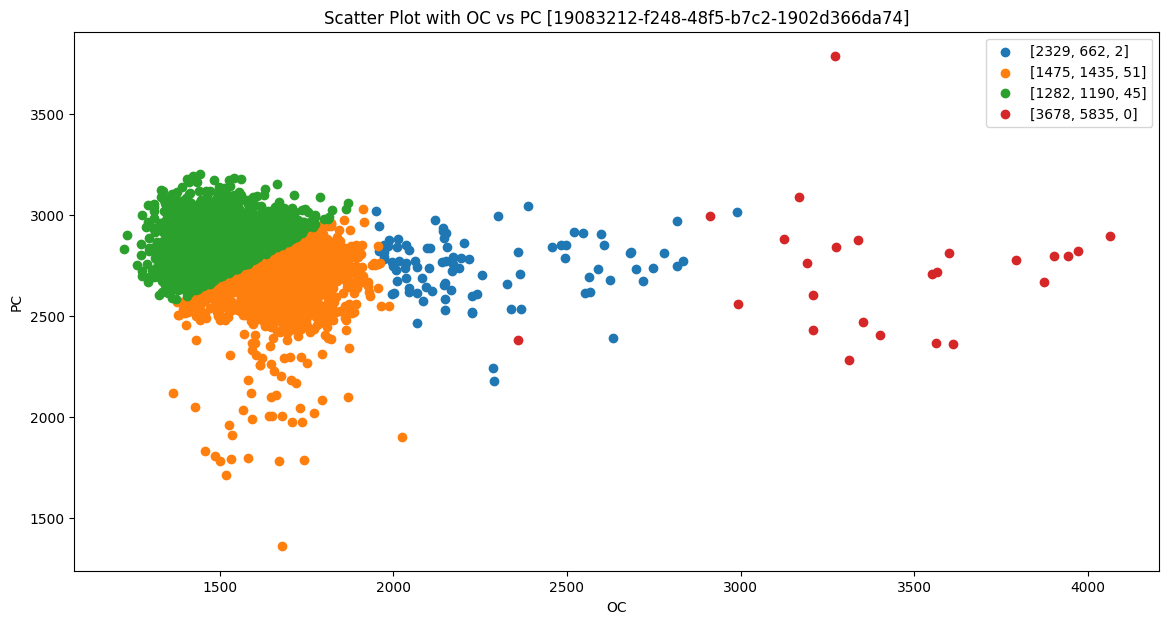

C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



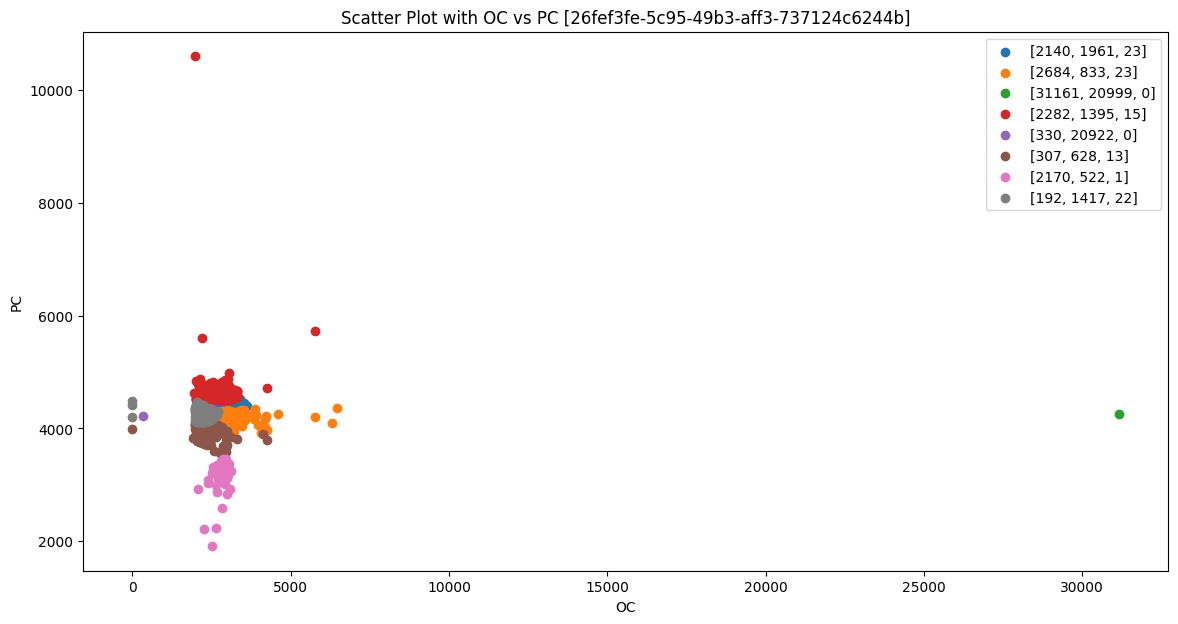

C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



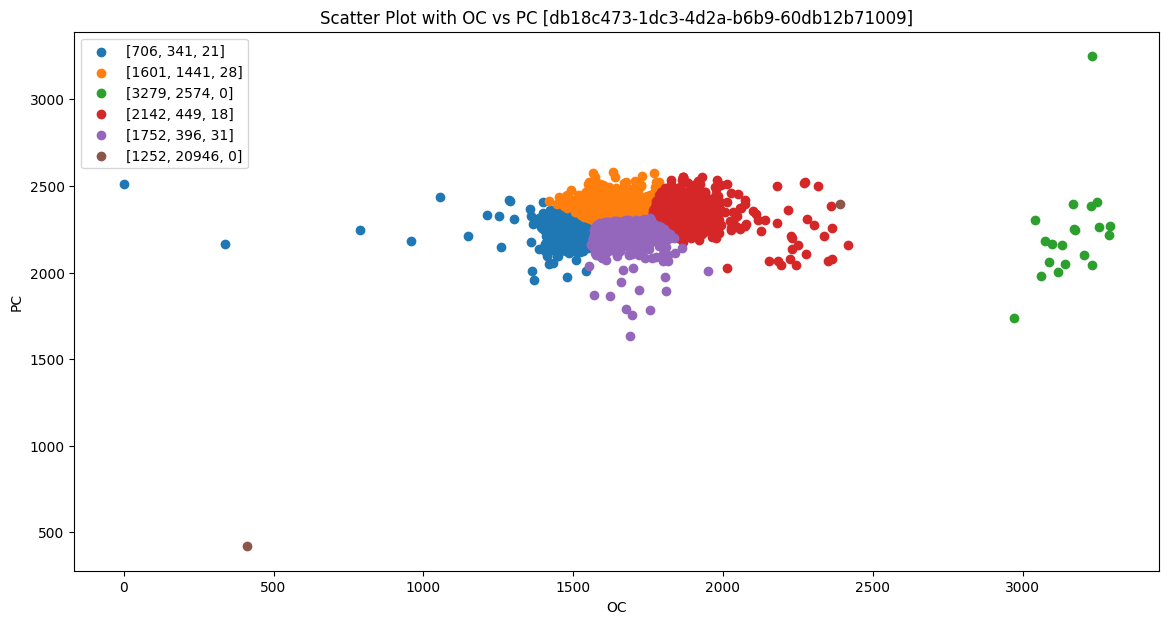

C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



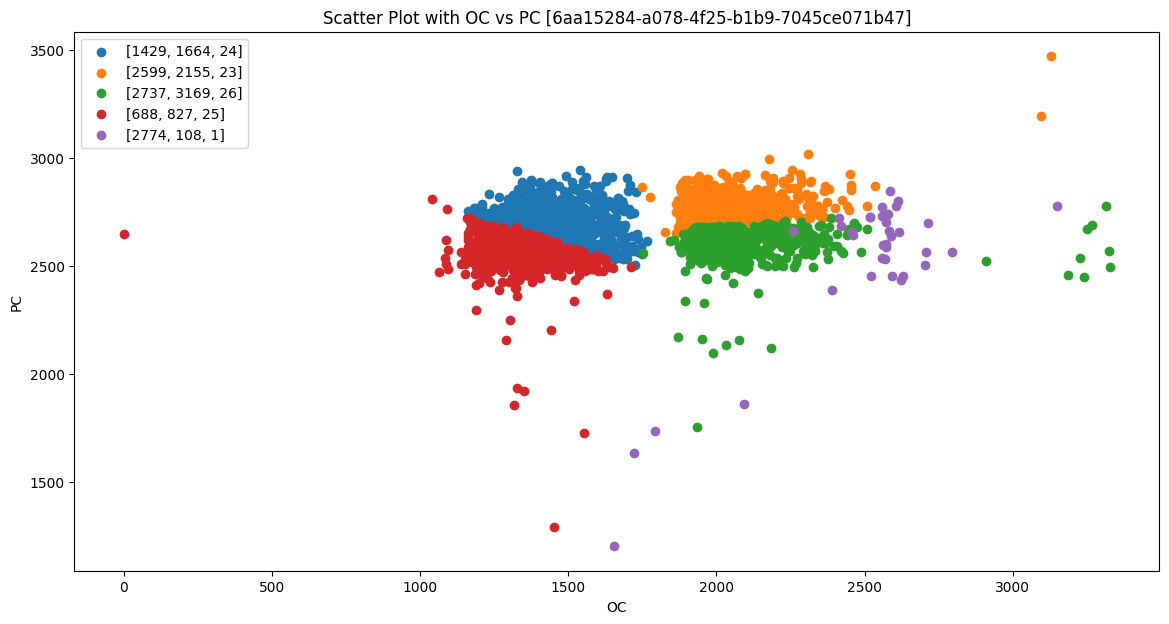

In [16]:
for device in unique_device:
    sub_df=df[df["DeviceID"]==device]
    model:KMeans=models[device]
    sub_df["Cluster"]=model.labels_
    plot_cluster_dataset(sub_df,device,model)

In [17]:
def cluster_row_count(unique_device:list[str]):
    for device in unique_device:
        sub_df=df[df["DeviceID"]==device]
        model:KMeans=models[device]
        sub_df["Cluster"]=model.labels_
        total_rows=sub_df.shape[0]
        for i in range(len(model.cluster_centers_)):
            sub=sub_df[sub_df["Cluster"]==i]
            sub_rows=sub.shape[0]
            sub_rows_percent=(100*sub_rows)/total_rows
            print(device,i,round(sub_rows_percent,1))
            
        
cluster_row_count(unique_device)

e77b973a-b7c9-4113-8598-4e85be9a8b34 0 22.3
e77b973a-b7c9-4113-8598-4e85be9a8b34 1 49.5
e77b973a-b7c9-4113-8598-4e85be9a8b34 2 0.4
e77b973a-b7c9-4113-8598-4e85be9a8b34 3 27.3
e77b973a-b7c9-4113-8598-4e85be9a8b34 4 0.6
19083212-f248-48f5-b7c2-1902d366da74 0 2.1
19083212-f248-48f5-b7c2-1902d366da74 1 51.5
19083212-f248-48f5-b7c2-1902d366da74 2 45.9
19083212-f248-48f5-b7c2-1902d366da74 3 0.6
26fef3fe-5c95-49b3-aff3-737124c6244b 0 24.0
26fef3fe-5c95-49b3-aff3-737124c6244b 1 23.2
26fef3fe-5c95-49b3-aff3-737124c6244b 2 0.0
26fef3fe-5c95-49b3-aff3-737124c6244b 3 15.3
26fef3fe-5c95-49b3-aff3-737124c6244b 4 0.0
26fef3fe-5c95-49b3-aff3-737124c6244b 5 13.5
26fef3fe-5c95-49b3-aff3-737124c6244b 6 1.0
26fef3fe-5c95-49b3-aff3-737124c6244b 7 23.0
db18c473-1dc3-4d2a-b6b9-60db12b71009 0 21.0
db18c473-1dc3-4d2a-b6b9-60db12b71009 1 28.6
db18c473-1dc3-4d2a-b6b9-60db12b71009 2 0.8
db18c473-1dc3-4d2a-b6b9-60db12b71009 3 18.0
db18c473-1dc3-4d2a-b6b9-60db12b71009 4 31.4
db18c473-1dc3-4d2a-b6b9-60db12b71009 5 0

C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3177315460.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3177315460.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_5996\3177315460.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl